Розділяючий вектор: [ 0.24752845  0.54391462 -0.03934565]


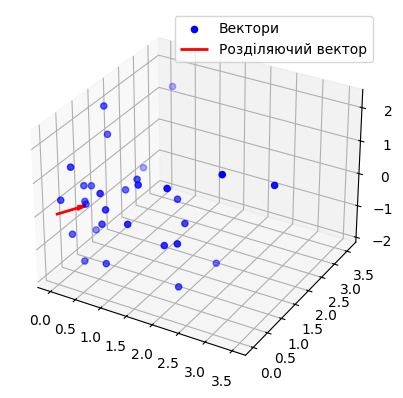

In [3]:
import numpy as np
from scipy.optimize import golden
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Генерація випадкових тривимірних векторів
def generate_vectors(n):
    """
    Генерує N тривимірних незалежних векторів.
    Перші дві координати - показниковий розподіл, третя - нормальний розподіл.
    """
    return np.column_stack([
        np.random.exponential(scale=1, size=n),
        np.random.exponential(scale=1, size=n),
        np.random.normal(size=n)
    ])

# Алгоритм Козинця
def kozinets(x, at, tolerance=1e-6):
    """
    Реалізація алгоритму Козинця для знаходження розділяючого вектора.
    :param x: масив векторів (N x 3).
    :param at: початковий вектор.
    :param tolerance: точність для зупинки.
    :return: розділяючий вектор.
    """
    for j in range(0, x.shape[0]):
        scalar_mult = np.dot(x[j], at)
        if scalar_mult <= 0:
            # Знайдено вектор x_j із скалярним добутком <= 0
            xj = x[j]

            # Мінімізуємо вираз за допомогою золотого перетину
            f = lambda k: np.linalg.norm((1 - k) * at + k * xj)
            k = golden(f)

            # Обчислення нового вектора at
            at1 = (1 - k) * at + k * xj
            # Перевірка збіжності
            if np.linalg.norm(at1 - at) < tolerance:
                return at1
            # Рекурсивний виклик для нового вектора
            return kozinets(x, at1)

    # Якщо всі вектори мають скалярний добуток > 0, повертаємо at
    return at

# Візуалізація результату
def visualize(vectors, separating_vector):
    """
    Візуалізує набір векторів та знайдений розділяючий вектор у 3D.
    """
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    # Точки
    ax.scatter(vectors[:, 0], vectors[:, 1], vectors[:, 2], c='blue', label='Вектори')

    # Розділяючий вектор
    ax.quiver(0, 0, 0, separating_vector[0], separating_vector[1], separating_vector[2],
              color='red', label='Розділяючий вектор', linewidth=2)

    ax.legend()
    plt.show()

# Основний блок виконання
if __name__ == "__main__":
    # Кількість векторів
    N = 30

    # Генерація векторів
    vectors = generate_vectors(N)

    # Початковий вектор
    initial_vector = vectors[0]

    # Алгоритм Козинця
    try:
        separating_vector = kozinets(vectors, initial_vector)
        print("Розділяючий вектор:", separating_vector)

        # Візуалізація
        visualize(vectors, separating_vector)
    except Exception as e:
        print("Помилка:", e)
